<a href="https://colab.research.google.com/github/Abrahammar997/numerico-invierno-2021/blob/main/ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
C = np.array(
    [
     [2,2],
     [3,2],
     [4,3],
     [5,3],
     [5,4],
     [5,5],
     [4,5],
     [3,6],
     [2,6],
     [2,7],
     [3,8],
     [4,9],
     [5,9],
     [6,9],
     [7,9],
     [8,8],
     [8,7],
     [7,7],
     [6,7],
     [5,7],
     [4,7],
     [5,6],
     [6,6],
     [6,5],
     [6,4],
     [6,3],
     [5,3],
     [5,2],
     [4,2],
     [3,2]
    ]
)

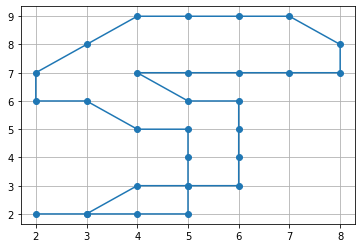

In [ ]:
plt.plot(C[:,0],C[:,1],'o-')
plt.grid()
plt.show()

In [ ]:
def l(C,i,k):
  n = C.shape[0]
  return np.norm(C[(i-k)%n,:]-C[(i+k)%n,:])

def d(C,i,k):
  v1 = C[(i+k)%n,:]-C[(i-k)%n,:]
  v2 = C[i%n,:]-C[(i-k)%n,:]
  np.norm(v1-(v1 @ v2 )*v2/np.norm(v2))



In [ ]:
def step2Dominio(C,i):
  k=0
  cond1=True
  cond2=True
  while (not(con1 or cond2)): #?
    k += 1

    lik = l(C,i,k)
    lik1 = l(C,i,k+1)
    dik = d(C,i,k)
    dik1 = d(C,i,k+1)

    cond1 =  lik >= lik1  #Booleano
    if(dik>0):
      cond2 =  dik/lik >= dik1/lik1 #Booleano
    elif(dik<0):
      cond2 =  dik/lik <= dik1/lik1 #Booleano
    else:
      cond2 = False
  return k

In [ ]:
def angle_f(C,i):
  ci = C[i,:]-C[i-1,:]
  theta = 

def CUR_i_k(C,i,k):
  Curv = 0
  for j in range(1,k+1):
    Curv += angle_f(C,i-j)
  for j in range(1,k+1):
    Curv += -angle_f(C,i+j)
  Curv = (1/k)*Curv
  return Curv

In [ ]:
def theta(v1,v2):
  return np.arccos((v1@v2)/(np.norm(v1)*np.norm(v2)))

def puntos_derecha(C,i):
  Ri = C[i+1,:]-C[i,:]
  j=1
  cond1 = False
  cond2 = False
  while(not(cond1 and cond2)):
    Rij = C[i+j,:]-C[i,:]
    Rijmenos1 = C[i+j-1,:]-C[i,:]
    Rijmas1 = C[i+j+1,:]-C[i,:]

    tethaj = theta(Rij,Ri)
    tethajmenos1 = theta(Rijmenos1,Ri)
    tethajmas1 = theta(Rijmas1,Ri)

    cond1 = tethajmenos1 < tethaj #bool
    cond2 = tethaj <= tethajmas1
    j += 1
  return j